In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from matplotlib.colors import ListedColormap
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 6.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
pd.options.display.max_rows=50

Populating the interactive namespace from numpy and matplotlib


In [20]:
base='/Users/attiladobi/nacosa/New SW Finance Data (Oct 2016)/April to June/'
import os
from glob import glob
Q1_reports = [y for x in os.walk(base) for y in glob(os.path.join(x[0], '*.xlsx'))]

In [25]:
xlsx_obj=pd.ExcelFile(Q1_reports[0])

<h1> Def a function to pull out anything containing payment recommendation </h1>

In [2]:
def find_sheet_name(target_text,sheet_names):
    '''Return a list of sheet names containing a specific string'''
    return [name for name in sheet_names if target_text.lower() in name.lower()]
def find_column_name(target,columns):
    return [name for name in columns if target.lower() in name.lower()]

<h1> Map months to quarter and period </h1>

In [3]:
quarter_map={1:(1,1),2:(1,2),3:(2,3),4:(2,4),5:(3,1),6:(3,2),7:(4,3),8:(4,4),9:(5,1),10:(5,2),11:(6,3),12:(6,4)}
#period quarter

In [4]:
def pq_lookup(date):
    '''retun period, quarter given a date (year,month,day)'''
    #3 month index to period quarter
    quarter_map={1:(1,1),2:(1,2),3:(2,3),4:(2,4),5:(3,1),6:(3,2),7:(4,3),8:(4,4),9:(5,1),10:(5,2),11:(6,3),12:(6,4)}
    qnum=1+int((date.month-pd.datetime(2016,4,1).month)/3)
    p,q=quarter_map[qnum]
    return p,q

In [108]:
pq_lookup(pd.datetime(2016,4,1))

(1, 1)

<h1> List the sheet names </h1>

In [42]:
sheet_names=xlsx_obj.sheet_names
sheet_name=find_sheet_name('payment recommendation',sheet_names)[0]

In [102]:
df=xlsx_obj.parse(sheetname=sheet_name,parse_cols=12,skiprows=7, skip_footer =500).dropna(subset=['INDICATORS']) #

In [103]:
df.columns

Index([   u'Unnamed: 0',    u'INDICATORS',    u'Unnamed: 2',    u'Unnamed: 3',
            u'TARGET  ',   u'ACTUAL     ',    u'TARGET  .1', u'ACTUAL     .1',
          u'TARGET  .2', u'ACTUAL     .2',    u'TARGET  .3', u'ACTUAL     .3',
                   u'%'],
      dtype='object')

In [118]:
sub_df=df[['INDICATORS','TARGET  ','ACTUAL     ']][1:]

In [119]:
date=pd.datetime(2016,4,1)
p,q= pq_lookup(date)
sub_df['Date']=date
sub_df['Period']=p
sub_df['Quarter']=q

In [138]:
year=2016
q1_months=[4,5,6]
column_heads=['','.1','.2']
df_list=[]

for month, col_head in zip(q1_months,column_heads):
    date=pd.datetime(year,month,1)
    p,q= pq_lookup(date)
    
    sub_df=df[['INDICATORS','TARGET  '+col_head,'ACTUAL     '+col_head]][1:].replace(nan,0)
    sub_df.columns=['INDICATOR','TARGET','ACTUAL']
    sub_df['Date']=date
    sub_df['Period']=p
    sub_df['Quarter']=q
    df_list.append(sub_df)

In [139]:
pd.concat(df_list)[:28]

,INDICATOR,TARGET,ACTUAL,Date,Period,Quarter
1,A1: Number of sex workers reached with HIV pre...,1260.000000,976.0,2016-04-01,1,1
2,A2: Number of sex workers who received one or ...,1260.000000,898.0,2016-04-01,1,1
3,E2: Number of SWs attending creative space wor...,75.000000,0.0,2016-04-01,1,1
4,B1: Number of Sex Workers that have received a...,66.666667,78.0,2016-04-01,1,1
6,C1: Number of SWs screened for Sexually Trans...,0.000000,0.0,2016-04-01,1,1
7,C2a: Number of SWs with a positive STI symptom...,0.000000,0.0,2016-04-01,1,1
8,C2b: Number of SWs with a positive STI symptom...,0.000000,0.0,2016-04-01,1,1
9,D1: Number of SWs screened for TB,0.000000,0.0,2016-04-01,1,1
10,D2: Number of SWs successfully referred for TB...,3.000000,0.0,2016-04-01,1,1
11,E1: Number of creative space workshops,0.000000,0.0,2016-04-01,1,1


<h1> Now loop through each SR and Q1,Q2 </h1>

In [2]:
Q1base='/Users/attiladobi/nacosa/New SW Finance Data (Oct 2016)/April to June/'
import os
from glob import glob
Q1_reports = [y for x in os.walk(Q1base) for y in glob(os.path.join(x[0], '*.xlsx'))]

In [10]:
filepath.split('/')[-1]

'PSH Finance Report May 2016.xlsx'

In [14]:
for filepath in Q1_reports:
    filepath=filepath.split('/')[-1]
    m = re.search(r'([A-Za-z ]+) Finance', filepath)
    if not m:
        print None
    print m.group(1).strip()

CPC
GRIP
HTT
LifeLine NC
LL Durban
LL FS
LL Zululand
Nqobile Women
Oasis
PHRU
QAC
SWEAT
THCA
WRHI
Munna Ndi Nnyi
Munna Ndi Nnyi
Munna Ndi Nnyi
PSH
PSH
PSH


<h1> recursivley loop through all file names in the directory </h1>

In [4]:
import re
#search for the SR by finding the string between the last / and the word " Finance"
SRs=[name.split('/')[-1].split(' Finance')[0] for name in Q1_reports]
[name.split('2016')[-1].strip() for name in SRs]

['CPC',
 'GRIP',
 'HTT',
 'LifeLine NC',
 'LL Durban',
 'LL FS',
 'LL Zululand',
 'Nqobile Women',
 'Oasis',
 'PHRU',
 'QAC',
 'SWEAT',
 'THCA',
 'WRHI',
 'Munna Ndi Nnyi',
 'Munna Ndi Nnyi',
 'Munna Ndi Nnyi',
 'PSH',
 'PSH',
 'PSH']

In [202]:
Q1base='/Users/attiladobi/nacosa/New SW Finance Data (Oct 2016)/April to June/'
Q1_reports=[Q1base+fname for fname in os.listdir(Q1base) if 'xlsx' in fname]
SRs=[name.split('/')[-1].split(' Finance')[0] for name in Q1_reports]

<h1> loop thorugh files and import targets and actual values for validation</h1>

In [6]:
Q1base='/Users/attiladobi/nacosa/New SW Finance Data (Oct 2016)/April to June/'
Q1_reports=[Q1base+fname for fname in os.listdir(Q1base) if 'xlsx' in fname]

year=2016
q1_months=[4,5,6]
df_list=[]

for q1_report in Q1_reports:
    #get SR name from file path
    SR=q1_report.split('/')[-1].split(' Finance')[0]
    #read in the reports for q1
    try:
        xlsx_obj=pd.ExcelFile(q1_report)
    except IOError:
        print 'no such file'
    #read in relavent sheet name
    sheet_names=xlsx_obj.sheet_names
    sheet_name=find_sheet_name('payment recommendation',sheet_names)[0]
    #find the column that contains "indicator"
    col_name=find_column_name('indicator',xlsx_obj.parse(sheetname=sheet_name,parse_cols=12,skiprows=7, nrows=1).columns)
    df=xlsx_obj.parse(sheetname=sheet_name,parse_cols=12,skiprows=7).dropna(subset=col_name) #drop from 1st nan entry
    df=df.rename(columns={col_name[0]:'Indicator'})
    to_drop=find_column_name('Unnamed',df.columns) #find all unnamed columns
    df=df.drop(to_drop,1) #drop all unnamed columns
    df=df[df['Indicator'].str.contains('Number',na=False)] #only keep rows where the indicator is a counts of something
    
    column_heads=['','.1','.2'] #.3 represents the quarterly total along with % of target hit
    
    for month, col_head in zip(q1_months,column_heads):
        date=pd.datetime(year,month,1)
        p,q= pq_lookup(date)

        sub_df=df[['Indicator','TARGET  '+col_head,'ACTUAL     '+col_head]][1:].replace(nan,0)
        sub_df.columns=['Indicator','Target','Actual'] #normalize naming convention
        if SR=='Oasis':
            SR='OASIS'
        if SR == 'Nqobile Women':
            SR='NQOBILE'
        if SR == 'THCA':
            SR ='TBHIV'
        sub_df['Subrecipient']=SR
        sub_df['Date']=date
        sub_df['Period']=p
        sub_df['Quarter']=q
        df_list.append(sub_df)
DF=pd.concat(df_list)

<h1> Debug LL import </h1>

In [643]:
q1_report=Q1_reports[0]
SR=q1_report.split('/')[-1].split(' Finance')[0]
#read in the reports for q1
try:
    xlsx_obj=pd.ExcelFile(q1_report)
except IOError:
    print 'no such file'
#read in relavent sheet name
sheet_names=xlsx_obj.sheet_names
sheet_name=find_sheet_name('payment recommendation',sheet_names)[0]
#find the column that contains "indicator"
col_name=find_column_name('indicator',xlsx_obj.parse(sheetname=sheet_name,parse_cols=12,skiprows=7, nrows=1).columns)
df=xlsx_obj.parse(sheetname=sheet_name,parse_cols=12,skiprows=7).dropna(subset=col_name) #drop from 1st nan entry
df=df.rename(columns={col_name[0]:'Indicator'})
to_drop=find_column_name('Unnamed',df.columns) #find all unnamed columns
df=df.drop(to_drop,1) #drop all unnamed columns
df=df[df['Indicator'].str.contains('Number',na=False)] #only keep rows where the indicator is a counts of something


In [20]:
DF.loc[(DF['Quarter']==1) & (DF['Period']==1) & (DF['Indicator'].str.contains('E4'))].groupby(['Subrecipient','Date','Indicator']).sum()

Target  \
Subrecipient Date       Indicator                                                     
CPC          2016-04-01 E4: Number of SWs attending small group workshops  283500.0   
             2016-05-01 E4: Number of SWs attending small group workshops  283500.0   
             2016-06-01 E4: Number of SWs attending small group workshops  283500.0   
NQOBILE      2016-04-01 E4: Number of SWs attending small group workshops       0.0   
             2016-05-01 E4: Number of SWs attending small group workshops       0.0   
             2016-06-01 E4: Number of SWs attending small group workshops       0.0   
OASIS        2016-04-01 E4: Number of SWs attending small group workshops       0.0   
             2016-05-01 E4: Number of SWs attending small group workshops       0.0   
             2016-06-01 E4: Number of SWs attending small group workshops       0.0   
PHRU         2016-04-01 E4: Number of SWs attending small group workshops       0.0   
             2016-05-01 E4: Number of SWs attending small group workshops       0.0   
             2016-06-01 E4: Number of SWs attending small group workshops       0.0   
QAC          2016-04-01 E4: Number of SWs attending small group workshops       0.0   
             2016-05-01 E4: Number of SWs attending small group workshops       0.0   
             2016-06-01 E4: Number of SWs attending small group workshops       0.0   
SWEAT        2016-04-01 E4: Number of SWs attending small group workshops  189000.0   
             2016-05-01 E4: Number of SWs attending small group workshops  189000.0   
             2016-06-01 E4: Number of SWs attending small group workshops  189000.0   
TBHIV        2016-04-01 E4: Number of SWs attending small group workshops       0.0   
             2016-05-01 E4: Number of SWs attending small group workshops       0.0   
             2016-06-01 E4: Number of SWs attending small group workshops       0.0   
WRHI         2016-04-01 E4: Number of SWs attending small group workshops       0.0   
             2016-05-01 E4: Number of SWs attending small group workshops       0.0   
             2016-06-01 E4: Number of SWs attending small group workshops       0.0   

                                                                            Actual  \
Subrecipient Date       Indicator                                                    
CPC          2016-04-01 E4: Number of SWs attending small group workshops  20440.0   
             2016-05-01 E4: Number of SWs attending small group workshops  53590.0   
             2016-06-01 E4: Number of SWs attending small group workshops  41590.0   
NQOBILE      2016-04-01 E4: Number of SWs attending small group workshops     13.0   
             2016-05-01 E4: Number of SWs attending small group workshops     11.0   
             2016-06-01 E4: Number of SWs attending small group workshops     10.0   
OASIS        2016-04-01 E4: Number of SWs attending small group workshops      0.0   
             2016-05-01 E4: Number of SWs attending small group workshops     30.0   
             2016-06-01 E4: Number of SWs attending small group workshops     10.0   
PHRU         2016-04-01 E4: Number of SWs attending small group workshops      0.0   
             2016-05-01 E4: Number of SWs attending small group workshops      0.0   
             2016-06-01 E4: Number of SWs attending small group workshops      0.0   
QAC          2016-04-01 E4: Number of SWs attending small group workshops      0.0   
             2016-05-01 E4: Number of SWs attending small group workshops      0.0   
             2016-06-01 E4: Number of SWs attending small group workshops      0.0   
SWEAT        2016-04-01 E4: Number of SWs attending small group workshops      0.0   
             2016-05-01 E4: Number of SWs attending small group workshops      0.0   
             2016-06-01 E4: Number of SWs attending small group workshops      0.0   
TBHIV        2016-04-01 E4: Number of SWs attending small group workshops      0.0   
        

In [633]:
#cut=xlsx_obj.parse(sheetname=sheet_name,parse_cols=12,skiprows=7)[col_name[0]].str.contains('Budget')==True

<h3> need to remove extra spaces in target names </h3>

In [8]:
DF['Indicator']=[' '.join(indicator.split()) for indicator in DF['Indicator']] #remove all double spaces

In [517]:
#DF.groupby(['Subrecipient','Indicator','Period','Quarter']).sum() #DF['Date'].dt.month

,,,,Target,Actual
Subrecipient,Indicator,Period,Quarter,,


<h1> Show that SRs that actually have data in their reports </h1>

In [653]:
[val for val in DF.groupby('Indicator').count().index]
#no LL  

[u'A2: Number of sex workers who received one or more services through outreach',
 u'B1: Number of Sex Workers that have received an HIV test during the reporting period and know their results',
 u'B2: Number of SWs who tested HIV negative in the reporting period',
 u'B3: Number of newly diagnosed HIV positive SWs',
 u'B4a: Number of newly diagnosed HIV positive SWs referred for ART',
 u'B4b: Number of newly diagnosed HIV positive SWs initiated on ART',
 u'B5: Number of SWs with known HIV positive status',
 u'B6: Number of SWs who refused HIV test',
 u'B7: Number of HIV negative SWs receiving PrEP',
 u'B8a: Number of HIV positive SWs referred for Adherence support',
 u'B8a: Number of HIV positive SWs succesfully referred for Adherence support',
 u'B8b: Number of HIV positive SWs succesfully referred for Adherence support',
 u'C1: Number of SWs screened for Sexually Transmitted Infections (STI)',
 u'C2: Number of SWs with a positive STI symptom referred for STI treatment',
 u'C2a: Numbe

In [9]:
report_targets=DF[(DF['Quarter']==1) & (DF['Period']==1)].groupby(['Subrecipient','Indicator']).sum()['Target']

In [10]:
report_targets

Subrecipient  Indicator                                                                                                                                           
CPC           A2: Number of sex workers who received one or more services through outreach                                                                              3780.0
              B1: Number of Sex Workers that have received an HIV test during the reporting period and know their results                                                200.0
              B2: Number of SWs who tested HIV negative in the reporting period                                                                                            0.0
              B3: Number of newly diagnosed HIV positive SWs                                                                                                               0.0
              B4a: Number of newly diagnosed HIV positive SWs referred for ART                                                           

<h1> Detect differences in target values. Like the F1 mixup for cpc </h1>

<h1> Read in values from NACOSA_targets.xlsx </h1>

In [568]:
DF2=pd.read_excel('/Users/attiladobi/Downloads/NACOSA_targets.xlsx')

#Replace empty entries with NaN
DF2['Value']=pd.to_numeric(DF2['Value'],errors='coerce')

#Replace all double spaces with single space
DF2['Indicator']=[' '.join(text.split()) for text in DF2['Indicator']]
#lower all SR names to match with other database
#DF['subrecipient']=DF['Subrecipient'].str.lower()

quarter_map={1:(1,1),2:(1,2),3:(2,3),4:(2,4),5:(3,1),6:(3,2),7:(4,3),8:(4,4),9:(5,1),10:(5,2),11:(6,3),12:(6,4)}
inv_quarter_map = {v: k for k, v in quarter_map.items()}
DF2['numQuarter']=[inv_quarter_map[tuple(p_q)] for p_q in DF2[['Period','Quarter']].values]
DF2['Subrecipient']=DF2['Subrecipient'].replace('QLAC','QAC')

<h1> Sum over all Non-transition items </h1>

In [569]:
targets_xlsx=DF2.loc[(DF2['Quarter']==1) & (DF2['Period']==1) & (DF2['Type'].str.contains('Non-transition'))]\
.groupby(['Subrecipient','Indicator']).sum().dropna()['Value']

In [578]:
targets_xlsx.index.levels[0] #['QAC']#['F1: Number of male Condoms distributed']

Index([    u'CPC',  u'Humana',   u'LLJBH', u'NQOBILE',   u'OASIS',    u'PHRU',
           u'QAC',   u'SWEAT',   u'TBHIV',    u'WRHI'],
      dtype='object', name=u'Subrecipient')

In [580]:
report_targets.index.levels[0] #actually have Q1 values

Index([u'CPC', u'GRIP', u'NQOBILE', u'OASIS', u'PHRU', u'QAC', u'SWEAT',
       u'THCA', u'WRHI'],
      dtype='object', name=u'Subrecipient')

In [572]:
report_target_ratio=(report_targets/targets_xlsx).dropna()
pd.DataFrame(report_target_ratio)

0
Subrecipient Indicator                                                   
CPC          A2: Number of sex workers who received one or m...  1.000000
             B1: Number of Sex Workers that have received an...  1.000000
             E1: Number of creative space workshops              0.000000
             E2: Number of SWs attending creative space work...  1.000000
             F1: Number of male Condoms distributed              0.070000
             F2: Number of female Condoms distributed            9.333333
             F3: Number of Lube distributed                      0.000000
NQOBILE      A2: Number of sex workers who received one or m...  1.000000
             B1: Number of Sex Workers that have received an...  0.995025
             B4a: Number of newly diagnosed HIV positive SWs...  0.000000
             B7: Number of HIV negative SWs receiving PrEP       0.000000
             B8b: Number of HIV positive SWs succesfully ref...  0.000000
             E1: Number of creative space workshops              1.000000
             E2: Number of SWs attending creative space work...  1.000000
             F1: Number of male Condoms distributed              1.000000
             F2: Number of female Condoms distributed            1.000000
             F3: Number of Lube distributed                      1.000000
OASIS        A2: Number of sex workers who received one or m...  1.000000
             B1: Number of Sex Workers that have received an...  1.002506
             B4a: Number of newly diagnosed HIV positive SWs...  0.000000
             B7: Number of HIV negative SWs receiving PrEP       0.000000
             B8b: Number of HIV positive SWs succesfully ref...  0.000000
             E1: Number of creative space workshops              1.000000
             E2: Number of SWs attending creative space work...  1.000000
             F1: Number of male Condoms distributed              1.000000
...                                                                   ...
QAC          E1: Number of creative space workshops              1.000000
             E2: Number of SWs attending creative space work...  1.000000
             F1: Number of male Condoms distributed              1.000000
             F2: Number of female Condoms distributed            1.000000
             F3: Number of Lube distributed                      1.000000
SWEAT        A2: Number of sex workers who received one or m...  1.000000
             B1: Number of Sex Workers that have received an...  0.000000
             B4a: Number of newly diagnosed HIV positive SWs...  0.000000
             B7: Number of HIV negative SWs receiving PrEP       0.000000
             B8b: Number of HIV positive SWs succesfully ref...  0.000000
             E1: Number of creative space workshops              0.000000
             E2: Number of SWs attending creative space work...  1.000000
             F1: Number of male Condoms distributed              0.050000
             F2: Number of female Condoms distributed            6.666667
             F3: Number of Lube distributed                      0.000000
WRHI         A2: Number of sex workers who received one or m...  1.000000
             B1: Number of Sex Workers that have received an...  1.000000
             B4a: Number of newly diagnosed HIV positive SWs...  0.000000
             B7: Number of HIV negative SWs receiving PrEP       0.000000
             B8b: Number of HIV positive SWs succesfully ref...  0.000000
             E1: Number of creative space workshops              1.000000
             E2: Number of SWs attending creative space work...  1.000000
             F1: Number of male Condoms distributed              1.000000
             F2: Number of female Condoms distributed            1.000000
             F3: Number of Lube distributed                      1.000000

[67 rows x 1 columns]

In [573]:
cmap = mpl.colors.ListedColormap(['red','yellow','green', 'yellow'])
bounds=[0,0.01,0.95,1.05,10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

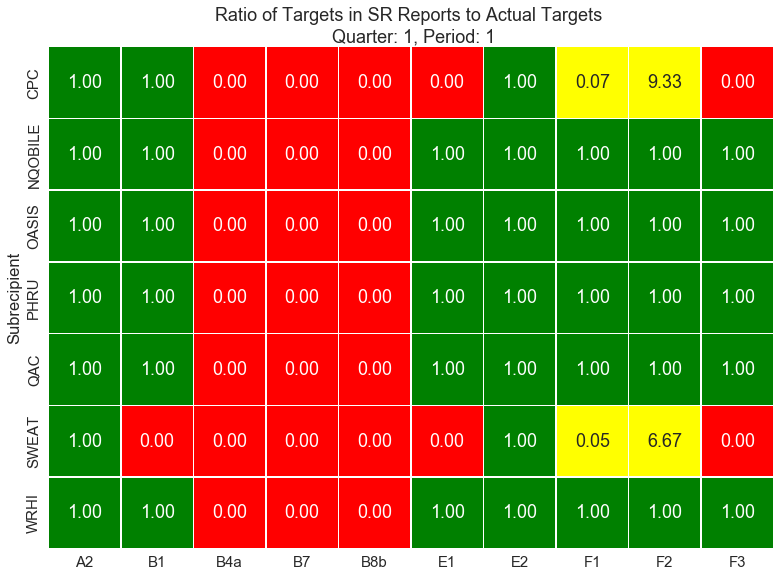

In [574]:
quarter=1
period=1

toplot=report_target_ratio.replace(nan,0)

#toplot=toplot.dropna()
#toplot/=toplot.groupby(level=1).sum()
#toplot

result = pd.DataFrame(toplot).reset_index().pivot(index='Subrecipient', columns='Indicator')[0].replace(nan,0)
result.columns=[val.split(':')[0] for val in result.columns]
fig=figure()
fig.set_size_inches(13, 9)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.heatmap(result, annot=True, fmt=".2f", cmap=cmap, norm=norm, label='big',\
             square=False,linewidths=0.5, cbar=False) #ListedColormap(['red','green', 'red']) #vmin=0,vmax=1.5
plt.title('Ratio of Targets in SR Reports to Actual Targets \n Quarter: {:d}, Period: {:d}'.format(quarter,period))
plt.show()